In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('/content/homicide_by_countries.csv')

In [4]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [5]:
df.tail()

,Location,Region,Subregion,Rate,Count,Year
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015
194,Zimbabwe,Africa,Eastern Africa,7.5,981,2012


In [6]:
df.shape

(195, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [8]:
df.describe()

,Rate,Count,Year
count,195.000000,195.000000,195.000000
mean,6.845128,1942.800000,2017.420513
std,9.600060,6553.343376,3.589445
min,0.000000,0.000000,2006.000000
25%,1.100000,28.000000,2016.000000
50%,2.600000,128.000000,2019.000000
75%,7.850000,785.000000,2020.000000
max,49.300000,47722.000000,2021.000000


In [9]:
df.isnull().sum()

,0
Location,0
Region,0
Subregion,0
Rate,0
Count,0
Year,0


In [10]:
df.dtypes

,0
Location,object
Region,object
Subregion,object
Rate,float64
Count,int64
Year,int64


In [11]:
df['Rate']=df['Rate'].astype(int)

In [12]:
df.dtypes

,0
Location,object
Region,object
Subregion,object
Rate,int64
Count,int64
Year,int64


In [13]:
my_list = ['Rate', 'Count', 'Year']
for i in my_list:
  print(i)
  df[i] = df[i].astype(int)

Rate
Count
Year


In [14]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [15]:
df1=df.sort_values('Count', ascending=False)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [16]:
df1=df[['Location','Count']].sort_values(by='Count', ascending=False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


<Axes: xlabel='Location'>

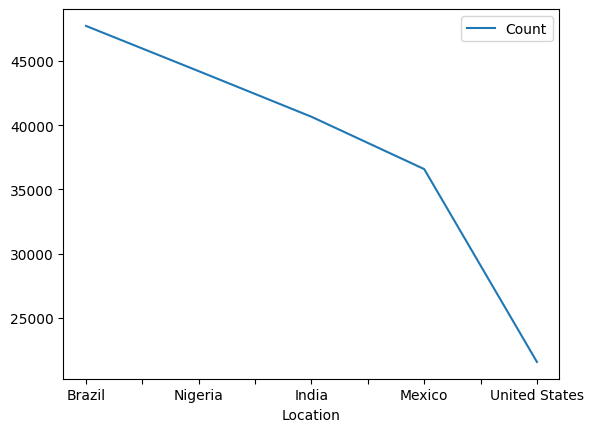

In [17]:
df1.plot(x = 'Location', y = 'Count')

In [18]:
df1.Location

,Location
26,Brazil
125,Nigeria
78,India
111,Mexico
186,United States


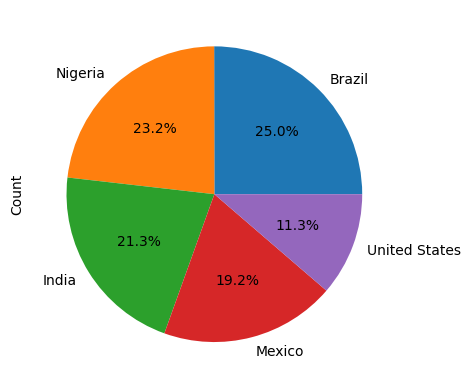

In [19]:
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.1f%%')
plt.legend().set_visible(False)

In [20]:
df1=df[['Location','Count']].sort_values(by='Count', ascending=False).head(5)

df1['Perc'] = (df1['Count']*100/df1['Count'].sum()).round(2)

df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


In [21]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [22]:
df['Region'].replace('Americas', 'N/S Americas', inplace=True)

<ipython-input-22-b148770810d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].replace('Americas', 'N/S Americas', inplace=True)


In [23]:
df2=df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2

,Count
Region,
N/S Americas,153597
Asia,105552
Africa,99481
Europe,19869
Oceania,347


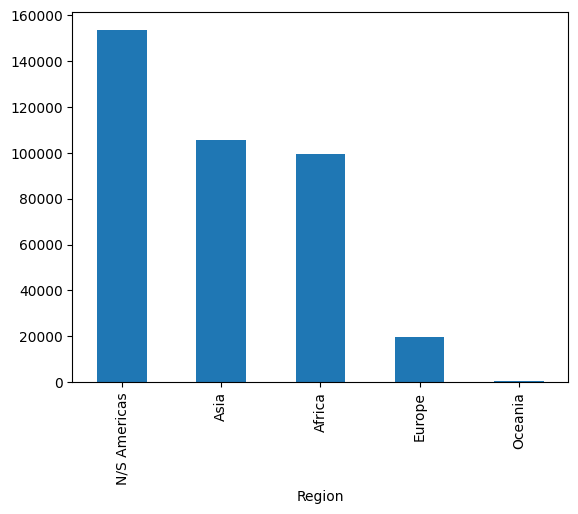

In [24]:
df2.plot(kind='bar')
plt.show()

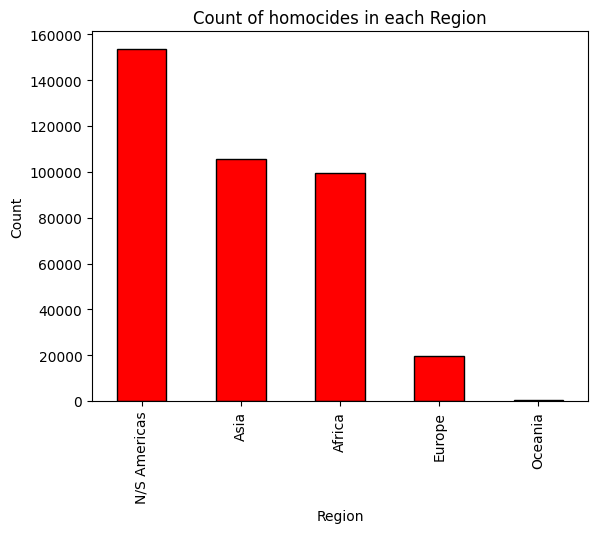

In [25]:
df2.plot(kind='bar', color='red', edgecolor='black')
plt.ylabel('Count')

plt.title('Count of homocides in each Region')
plt.show()

In [26]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [27]:
df3=df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

,Count
Subregion,
South America,78872
Southern Asia,58631
Central America,47371
Western Africa,46318
South-Eastern Asia,25314
Eastern Africa,23669
Northern America,22317
Southern Africa,21479
Eastern Europe,14604


In [28]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [29]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

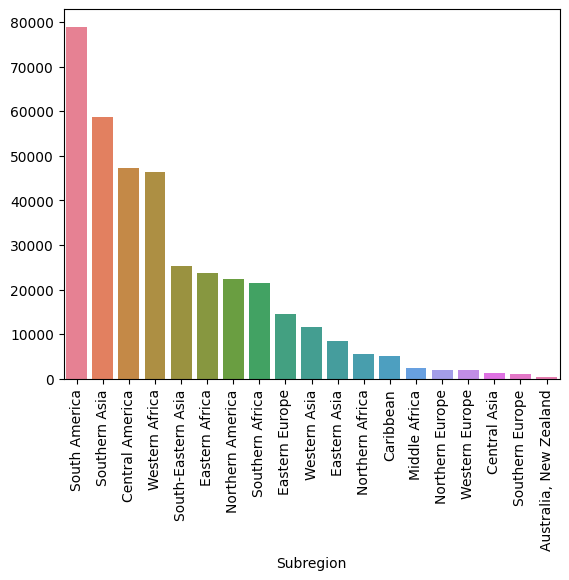

In [30]:
sns.barplot(x=df3.index, y=df3.values, hue=df3.index)
plt.xticks(rotation='vertical')
plt.xlabel = None

In [31]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [32]:
df.Year.value_counts()

,count
Year,
2020,94
2019,20
2018,13
2012,11
2017,10
2016,9
2015,9
2009,6
2014,5


In [33]:
df[df['Region'].isin(['Asia','Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [34]:
df4=df[( df['Region']=='Asia') | (df['Region']=='Europe') ]
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [35]:
df4= df4[df4['Year']>2015][['Region','Year','Count']]
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [36]:
df4=df4.groupby(['Region','Year']).sum()['Count']
df4

Region  Year
Asia    2016      627
        2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2016        0
        2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [37]:
df_unstacked=df4.unstack(level=0)
df_unstacked

Region,Asia,Europe
Year,,
2016,627.0,0.0
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [38]:
df_unstacked.index=df_unstacked.index.astype(int).astype(str)

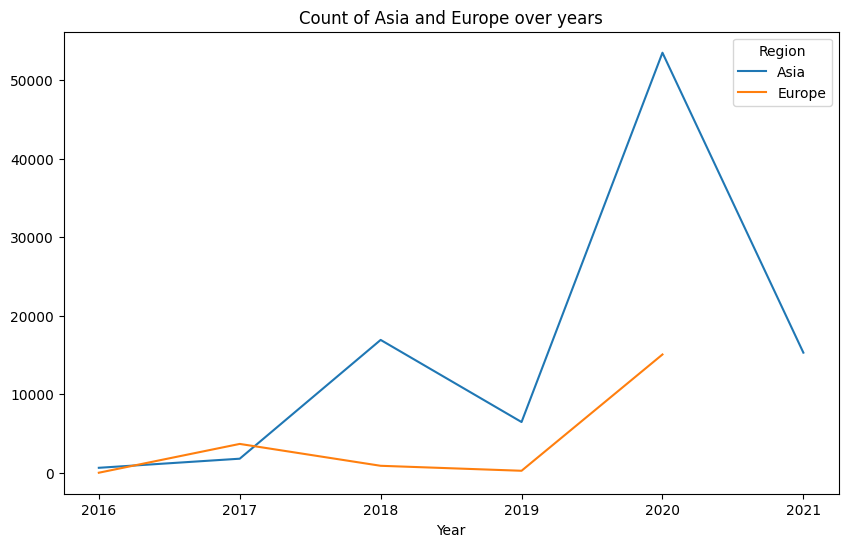

In [39]:
df_unstacked.plot(kind= 'line', figsize = (10, 6))

plt.title("Count of Asia and Europe over years")
plt.show()

In [40]:
df5=df.groupby('Year')['Rate'].sum().sort_values(ascending=False)
df5

,Rate
Year,
2020,564
2019,153
2012,113
2016,76
2018,64
2015,55
2014,52
2009,36
2021,28


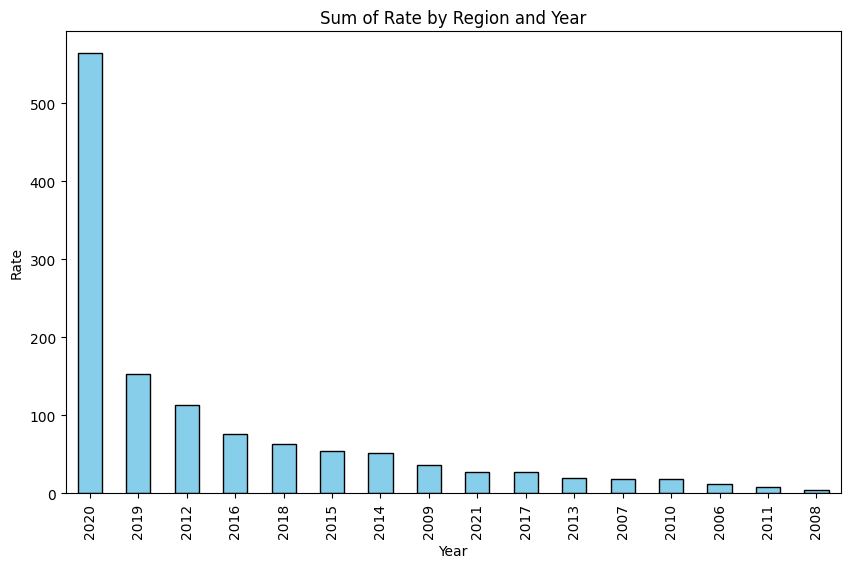

In [41]:
df5.plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')

plt.ylabel('Rate')
plt.title("Sum of Rate by Region and Year")
plt.show()

In [42]:
df6=df[['Year','Region','Count']]
df6

,Year,Region,Count
0,2018,Asia,2474
1,2020,Europe,61
2,2020,Africa,580
3,2020,Europe,2
4,2012,Africa,1217
...,...,...,...
190,2018,N/S Americas,10598
191,2011,Asia,1358
192,2013,Asia,1703
193,2015,Africa,853


In [43]:
df6=df6.groupby(['Year','Region']).sum().sort_values(by='Year',ascending=False).head(40)
df6

Count
Year Region              
2021 Asia           15299
2020 Oceania          221
     N/S Americas  134784
     Europe         15066
     Asia           53516
     Africa         28460
2019 Europe           249
     Africa         44210
     Asia            6458
     N/S Americas    4276
     Oceania          126
2018 N/S Americas   13793
     Europe           883
     Asia           16923
2017 Europe          3670
     Asia            1787
     Africa          1467
2016 Asia             627
     N/S Americas     608
     Europe             0
     Africa          4987
2015 Asia             241
     Africa          2206
     Europe             0
2014 N/S Americas      13
     Asia            3029
2013 Asia            5782
2012 Africa         15264
     N/S Americas      53
     Asia              61
2011 Asia            1626
     Africa           855
     Europe             0
2010 Europe             1
     Africa           303
2009 N/S Americas      42
     Africa            27
2008 Africa          1702
2007 N/S Americas      26
2006 N/S Americas       2

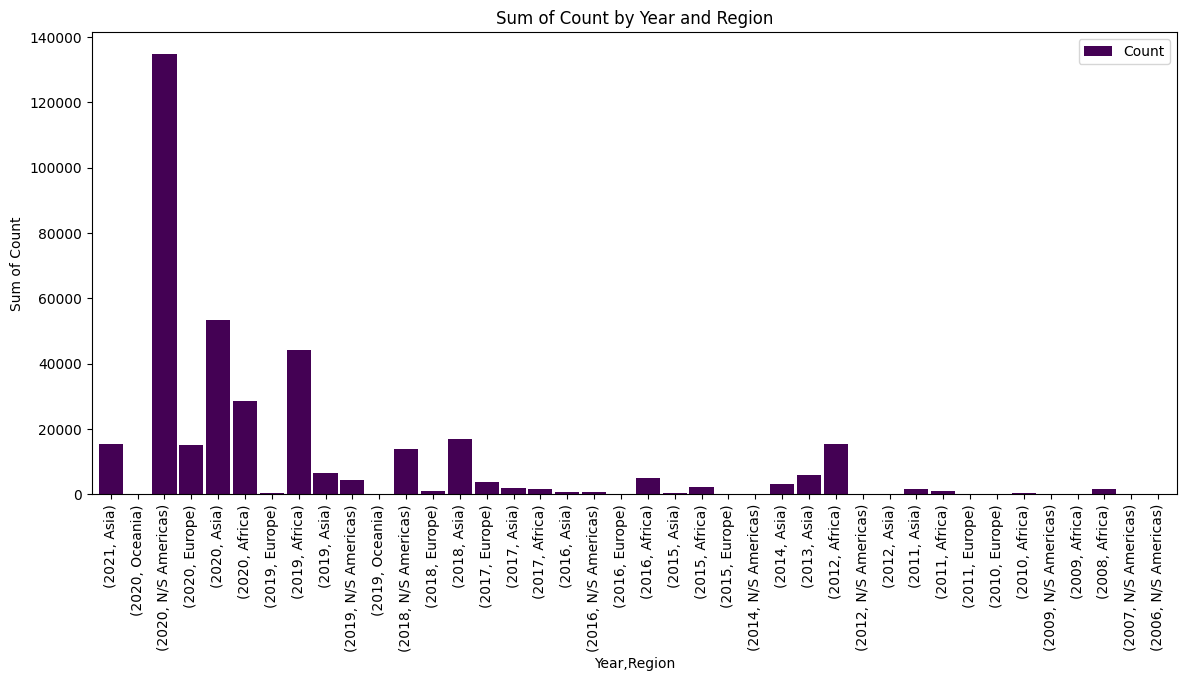

In [44]:
df6.plot(kind='bar', figsize=(14,6), colormap='viridis',width=0.9)

plt.ylabel('Sum of Count')
plt.title("Sum of Count by Year and Region")
plt.show()

In [45]:
df7=df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2)
df7

,Count
Subregion,
Southern Asia,6514.56
South America,6067.08
Central America,5921.38
Northern America,4463.40
Southern Africa,4295.80
Western Africa,4210.73
South-Eastern Asia,2531.40
Eastern Africa,1577.93
Eastern Europe,1460.40


In [46]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [47]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [48]:
data={
    'Category':df7.index,
    'Value':df7.values,
    'info':df7.values
}
df=pd.DataFrame(data)

df

,Category,Value,info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [49]:
data={
    'Category':df7.index,
    'Value':df7.values,
    'info':df7.values
}
df=pd.DataFrame(data)

df

,Category,Value,info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [50]:
fig=px.treemap(df, path=['Category'], values='Value', title='Treemap',branchvalues='total')
fig.update_traces(hovertemplate='Category: %{label}<br>Value:%{value}')
fig.show()